# Advanced Machine Learning
autor 1: Duy Anh Philippe Pham

version 5

python 3.7.3

Start: 13/10/20

End: 13/11/20

In [1]:
# General importation
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import decomposition

from sklearn.datasets import make_classification
from sklearn.datasets import make_circles 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

from scipy.spatial.distance import pdist, squareform

import time

# 1. Kernel-PCA
Compare classic PCA and k-PCA

## Classic PCA

In [2]:
def PCA(X,nbc=2):
    """
    Goal: reduce the dimension of a problem
    input
      X: dataset organise by colums represents features and lines represents samples
      nbc: number of componants we consider for the reduction of dimension
    output:
      X: reduction of dataset by nbc features and same number of samples
      T: Variance associate with each eigenvector
    """
    #print(np.shape(X))
    #Centred matrix
    X=X-np.mean(X,axis=0)
    
    #matrix of covariance
    n,m=np.shape(X)
    Xt=np.matrix.transpose(X)
    C=np.matmul(X,Xt)/n 
    
    #eigvals, eigvecs
    [U,D,VT] = la.svd(C) 
    
    #Class eigvals in decrease value
    idx = D.argsort()[::-1] 
    U = U[:,idx]
    D = D[idx] #eigen value
    VT = VT[idx]
    
    #Taux d'inertie
    T=D/np.sum(D)
    
    D=np.diag(D)
    #Probleme avec le calcul matriciel sur python
    X = np.matmul(U[:,0:nbc],D[0:nbc,0:nbc])# we have XV=UD
    ##X = np.matmul(X,VT[0:nbc,:])
    
    #X = np.matmul(U,D,VT)
    #print(np.shape(X))
    return X,T

### Benchmark

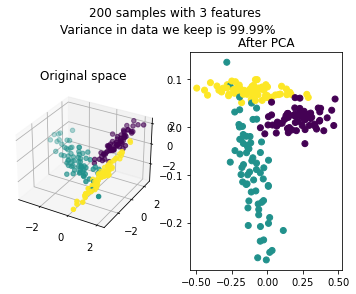

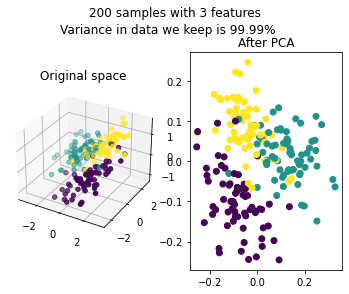

Time estimation to compute PCA with 200 samples with 3 features is 0.007664966583251953s


In [3]:
#Time benchmark reference
deltat=[]
execut=10
stopplot=2
for nbtest in range(0,execut):
    X,labels = make_classification(n_samples=200,n_features=3,n_redundant=1,n_repeated=0,n_informative=2,n_clusters_per_class=1,n_classes=3)
    t0 = time.time()
    Xs,Ts=PCA(X)
    t1 = time.time()

    if nbtest<stopplot:

        fig = plt.figure()
        plt.title('200 samples with 3 features\n\n')
        plt.suptitle('Variance in data we keep is '+str(int((Ts[0]+Ts[1])*10000)/100)+'% \n')
        plt.axis('off')

        int1=121
        ax1 = fig.add_subplot(int1,projection='3d')
        ax1.set_title('Original space')
        ax1.scatter(X[:,0],X[:,1],X[:,2],marker='o',c=labels)

        int2=122
        ax2 = fig.add_subplot(int2)
        ax2.set_title('After PCA')
        ax2.scatter(Xs[:,0],Xs[:,1],c=labels)
        plt.show()
        
    deltat.append(t1-t0)
    
print('Time estimation to compute PCA with 200 samples with 3 features is '+str(np.mean(deltat))+'s')

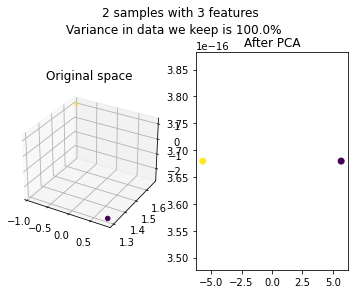

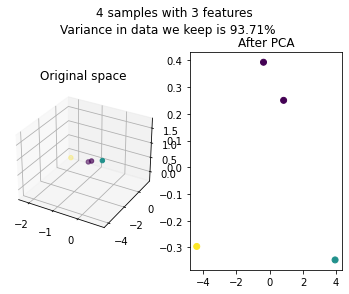

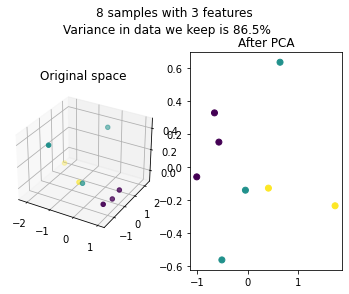

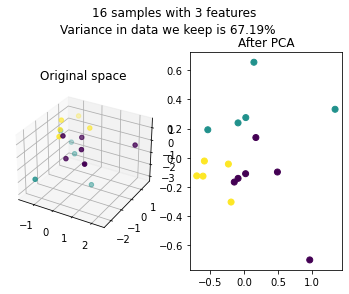

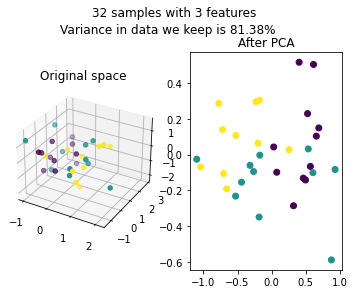

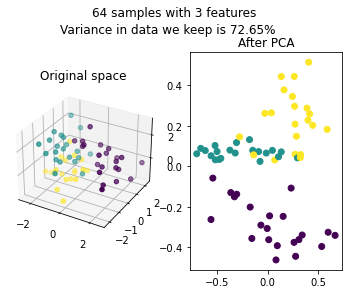

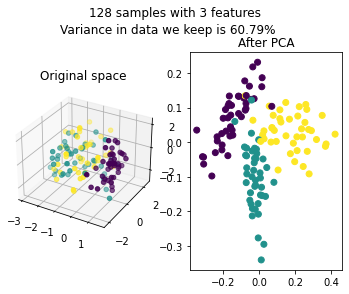

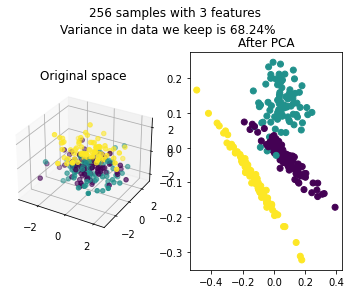

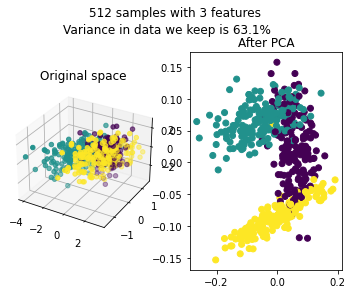

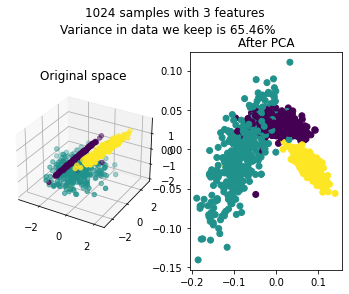

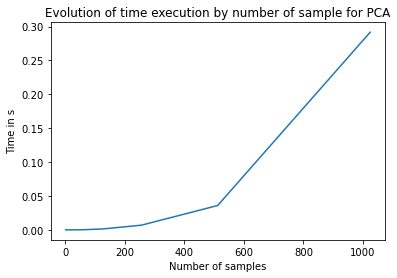

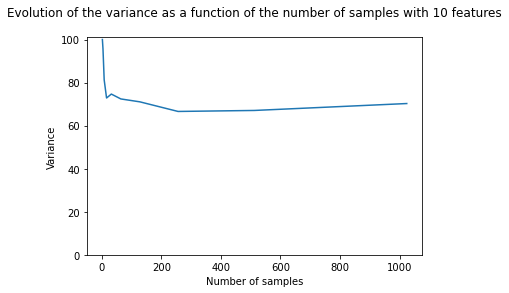

In [4]:
#Approximate complexity by modify number of samples
xx=[]
deltat2=[]
vary2=[]
execut2=11
execut1=10
stopplot=1

for powersample in range(1,execut2):
    deltat1=[]
    vary1=[]
    for nbtest in range(0,execut1):
        X,labels = make_classification(n_samples=2**powersample,n_features=5,n_redundant=1,n_repeated=0,n_informative=2,n_clusters_per_class=1,n_classes=3)
        
        t0 = time.time()
        Xs,Ts=PCA(X)
        t1 = time.time()
        if nbtest<stopplot:
            fig = plt.figure()
            plt.title(str(2**powersample)+' samples with 3 features\n \n')
            plt.suptitle('Variance in data we keep is '+str(int((Ts[0]+Ts[1])*10000)/100)+'% \n')
            plt.axis('off')

            int1=121
            ax1 = fig.add_subplot(int1,projection='3d')
            ax1.set_title('Original space')
            ax1.scatter(X[:,0],X[:,1],X[:,2],marker='o',c=labels)

            int2=122
            ax2 = fig.add_subplot(int2)
            ax2.set_title('After PCA')
            ax2.scatter(Xs[:,0],Xs[:,1],c=labels)
            plt.show()
            
        deltat1.append(t1-t0)
        vary1.append((Ts[0]+Ts[1])*100)
    xx.append(2**powersample)
    deltat2.append(np.mean(deltat1))
    vary2.append(np.mean(vary1))
    
fig = plt.figure()
plt.title('Evolution of time execution by number of sample for PCA')
plt.xlabel("Number of samples")
plt.ylabel("Time in s")
plt.plot(xx,deltat2)
plt.show()

fig = plt.figure()
plt.title('Evolution of the variance as a function of the number of samples with 10 features\n')
plt.xlabel("Number of samples")
plt.ylabel("Variance")
plt.ylim([0, 101])
plt.plot(xx,vary2)
plt.show()

## Kernel PCA
Add other kernel projection

NB : linear is classic PCA

In [5]:
def KernelPCA(X,nbc=2,gamma=2):
    """
    Goal: reduce the dimension of a problem by a kernel trics
    input
      X: dataset organise by colums represents features and lines represents samples
      nbc: number of componants we consider for the reduction of dimension
      gamma: parameter of projection in the Kernel PCA for gaussian
    output:
      X: reduction of dataset by nbc features and same number of samples
      T: Variance associate with each eigenvector
    """
    #print(np.shape(X))

    #Projection in infinite space thanks gaussian
    X2 = pdist(X, 'sqeuclidean')  
    X3 = squareform(X2)
    X = np.exp(-gamma * X3)     
    
    #Centred matrix
    X=X-np.mean(X,axis=0)
    
    #matrix of covariance
    n,m=np.shape(X)
    Xt=np.matrix.transpose(X)
    C=np.matmul(X,Xt)/n 
    
    #eigvals, eigvecs
    [U,D,VT] = la.svd(C) 
    
    #Class eigvals in decrease value
    idx = D.argsort()[::-1] 
    U = U[:,idx]
    D = D[idx] #eigen value
    VT = VT[idx]
    
    #Taux d'inertie
    T=D/np.sum(D)
    
    D=np.diag(D)
    X = np.matmul(U[:,0:nbc],D[0:nbc,0:nbc])# we have XV=UD
    ##X = np.matmul(X,VT[0:nbc,:])
    
    #X = np.matmul(U,D,VT)
    #print(np.shape(X))
    return X,T

### Benchmark

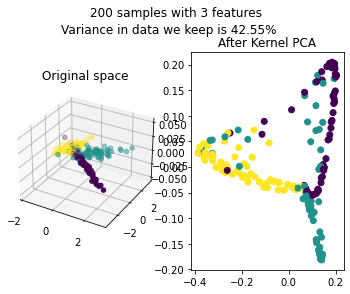

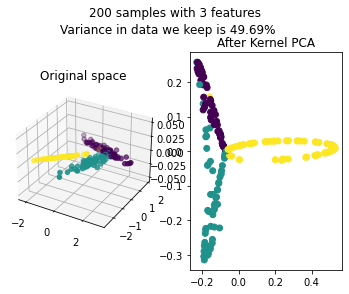

Time estimation to compute PCA with 200 samples with 3 features is 0.007097554206848144s


In [6]:
#Time benchmark reference
deltat=[]
execut=10
stopplot=2
for nbtest in range(0,execut):
    X,labels=make_classification(n_samples=200,n_features=3,n_redundant=1,n_repeated=0,n_informative=2,n_clusters_per_class=1,n_classes=3)
    t0 = time.time()
    Xs,Ts=KernelPCA(X)
    t1 = time.time()

    if nbtest<stopplot:
        fig = plt.figure()
        plt.title('200 samples with 3 features\n\n')
        plt.suptitle('Variance in data we keep is '+str(int((Ts[0]+Ts[1])*10000)/100)+'% \n')
        plt.axis('off')

        int1=121
        ax1 = fig.add_subplot(int1,projection='3d')
        ax1.set_title('Original space')
        ax1.scatter(X[:,0],X[:,1],marker='o',c=labels)

        int2=122
        ax2 = fig.add_subplot(int2)
        ax2.set_title('After Kernel PCA')
        ax2.scatter(Xs[:,0],Xs[:,1],c=labels)
        plt.show()
        
    deltat.append(t1-t0)
print('Time estimation to compute PCA with 200 samples with 3 features is '+str(np.mean(deltat))+'s')

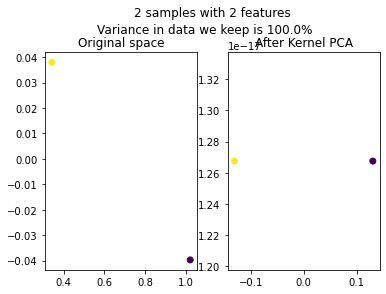

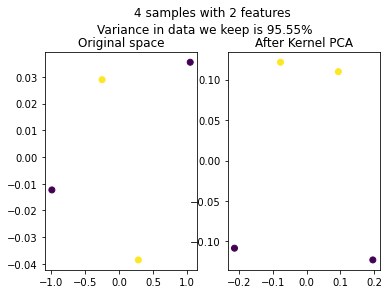

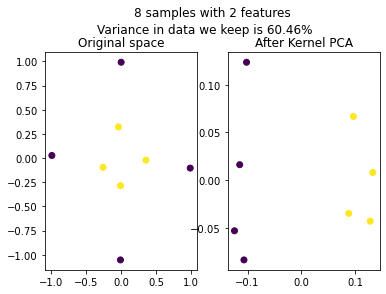

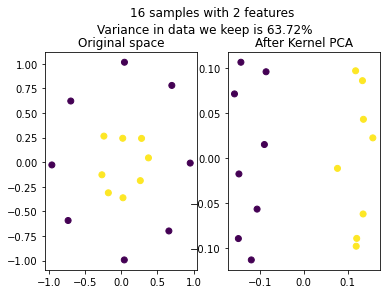

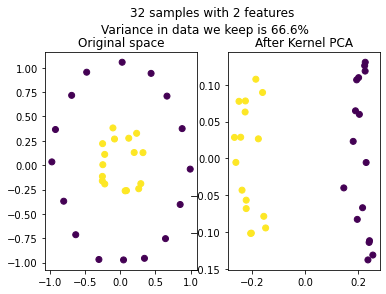

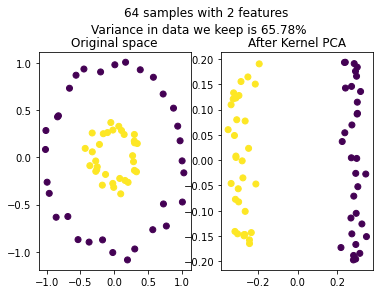

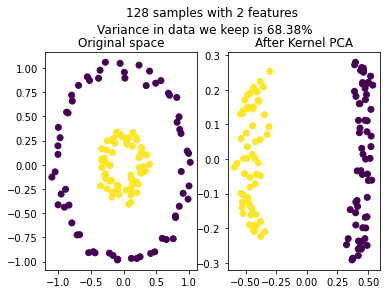

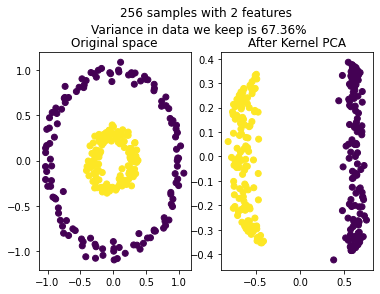

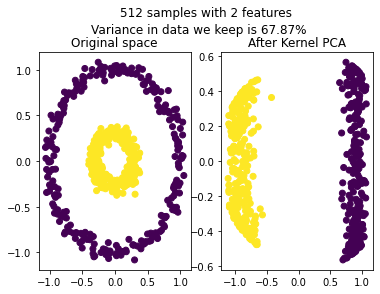

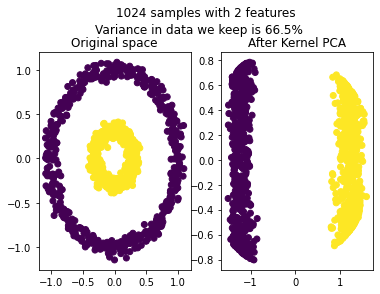

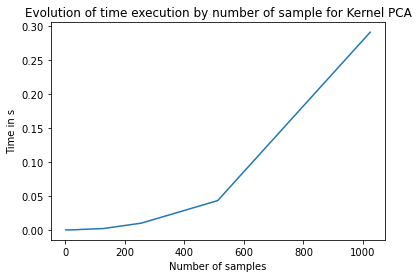

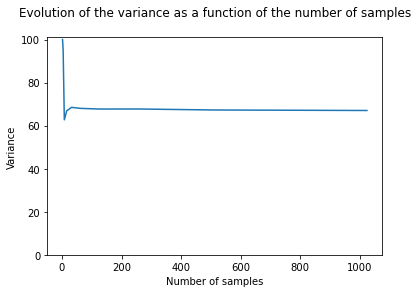

In [7]:
#Approximate complexity by modify number of samples
xx=[]
deltat2=[]
vary2=[]
execut2=11
execut1=10
stopplot=1

for powersample in range(1,execut2):
    deltat1=[]
    vary1=[]
    for nbtest in range(0,execut1):
        X, labels = make_circles(n_samples=2**powersample, factor=.3, noise=.05)
        t0 = time.time()
        Xs,Ts=KernelPCA(X)
        t1 = time.time()

        if nbtest<stopplot:

            fig = plt.figure()
            plt.title(str(2**powersample)+' samples with 2 features\n\n')
            plt.suptitle('Variance in data we keep is '+str(int((Ts[0]+Ts[1])*10000)/100)+'% \n')
            plt.axis('off')

            int1=121
            ax1 = fig.add_subplot(int1)
            ax1.set_title('Original space')
            ax1.scatter(X[:,0],X[:,1],marker='o',c=labels)

            int2=122
            ax2 = fig.add_subplot(int2)
            ax2.set_title('After Kernel PCA')
            ax2.scatter(Xs[:,0],Xs[:,1],c=labels)
            plt.show()

        deltat1.append(t1-t0)
        vary1.append((Ts[0]+Ts[1])*100)
    xx.append(2**powersample)
    deltat2.append(np.mean(deltat1))
    vary2.append(np.mean(vary1))

fig = plt.figure()
plt.title('Evolution of time execution by number of sample for Kernel PCA')
plt.xlabel("Number of samples")
plt.ylabel("Time in s")
plt.plot(xx,deltat2)
plt.show()

fig = plt.figure()
plt.title('Evolution of the variance as a function of the number of samples\n')
plt.xlabel("Number of samples")
plt.ylabel("Variance")
plt.ylim([0, 101])
plt.plot(xx,vary2)
plt.show()

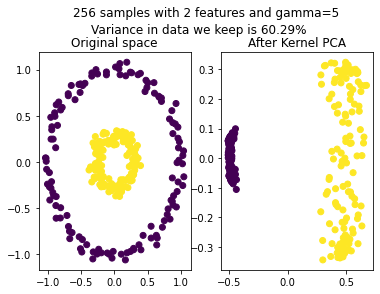

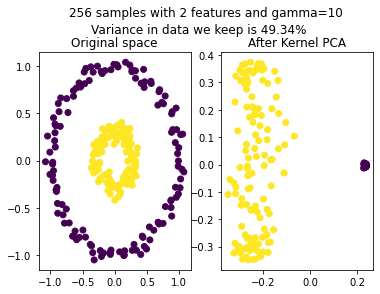

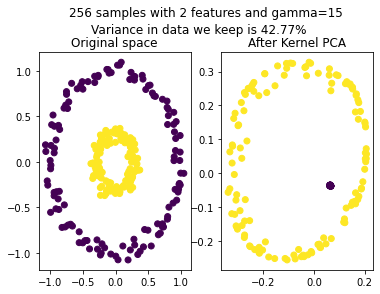

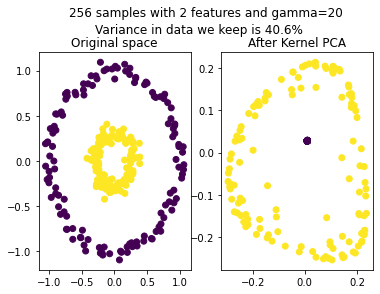

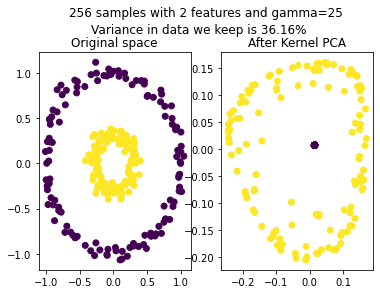

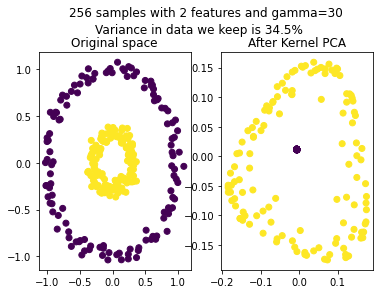

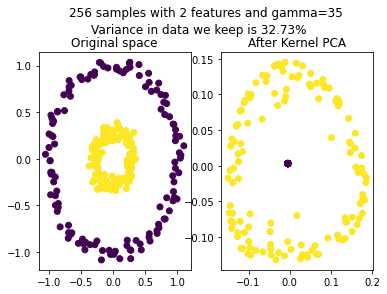

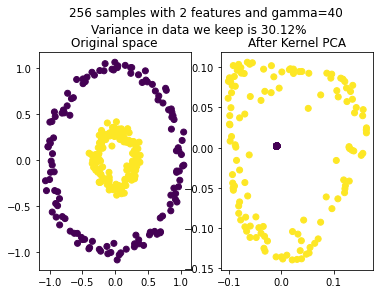

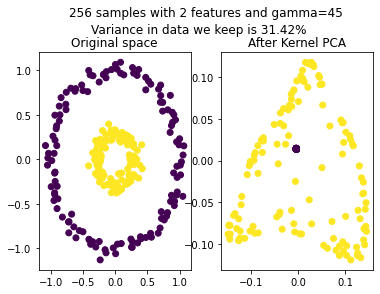

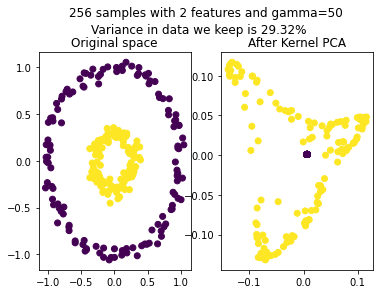

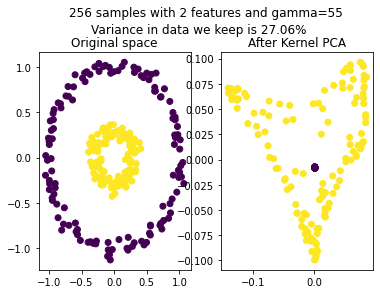

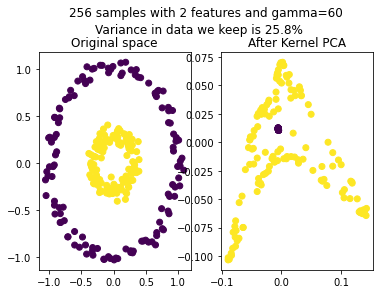

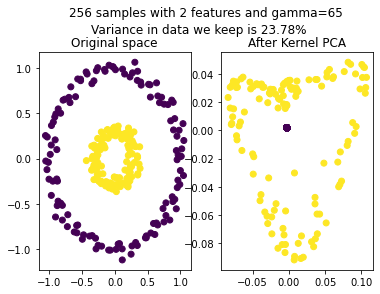

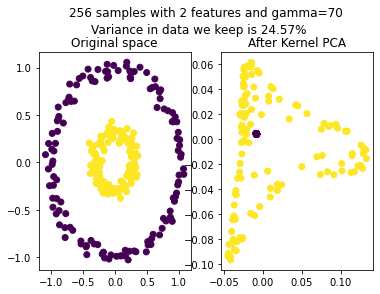

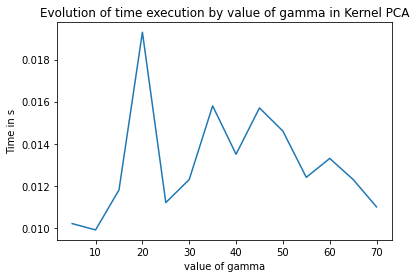

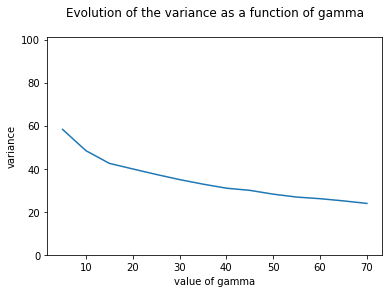

In [8]:
#Influence of gamma
xx=[]
deltat2=[]
vary2=[]
execut2=15
execut1=10
stopplot=1

for ng in range(1,execut2):
    deltat1=[]
    g=ng*5
    vary1=[]
    for nbtest in range(0,execut1):
        X, labels = make_circles(n_samples=256, factor=.3, noise=.05)
        t0 = time.time()
        Xs,Ts=KernelPCA(X,gamma=g)
        t1 = time.time()
        if nbtest<stopplot:
            fig = plt.figure()
            plt.title('256 samples with 2 features and gamma='+str(g)+'\n\n')
            plt.suptitle('Variance in data we keep is '+str(int((Ts[0]+Ts[1])*10000)/100)+'% \n')
            plt.axis('off')

            int1=121
            ax1 = fig.add_subplot(int1)
            ax1.set_title('Original space')
            ax1.scatter(X[:,0],X[:,1],marker='o',c=labels)

            int2=122
            ax2 = fig.add_subplot(int2)
            ax2.set_title('After Kernel PCA')
            ax2.scatter(Xs[:,0],Xs[:,1],c=labels)
            plt.show()

        deltat1.append(t1-t0)
        vary1.append((Ts[0]+Ts[1])*100)
    xx.append(g)
    deltat2.append(np.mean(deltat1))
    vary2.append(np.mean(vary1))
    
fig = plt.figure()
plt.title('Evolution of time execution by value of gamma in Kernel PCA')
plt.xlabel("value of gamma")
plt.ylabel("Time in s")
plt.plot(xx,deltat2)
plt.show()

fig = plt.figure()
plt.title('Evolution of the variance as a function of gamma\n')
plt.xlabel("value of gamma")
plt.ylabel("variance")
plt.ylim([0, 101])
plt.plot(xx,vary2)
plt.show()

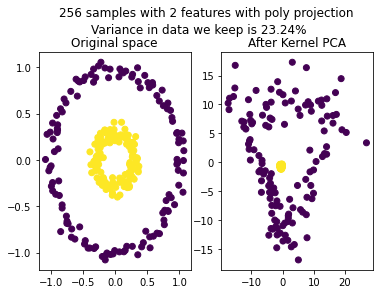

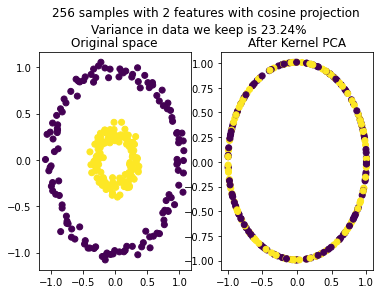

In [9]:
#Impact of others projections
def pshow(X,Xs,Vlabel,title):
    fig = plt.figure()
    plt.title('256 samples with 2 features with ' +str(title)+' projection\n\n')
    plt.suptitle('Variance in data we keep is '+str(int((Ts[0]+Ts[1])*10000)/100)+'% \n')
    plt.axis('off')

    int1=121
    ax1 = fig.add_subplot(int1)
    ax1.set_title('Original space')
    ax1.scatter(X[:,0],X[:,1],marker='o',c=Vlabel)

    int2=122
    ax2 = fig.add_subplot(int2)
    ax2.set_title('After Kernel PCA')
    ax2.scatter(Xs[:,0],Xs[:,1],c=Vlabel)
    plt.show()


X, labels = make_circles(n_samples=256, factor=.3, noise=.05)

#Poly
ppca = decomposition.KernelPCA(kernel='poly',degree=15)
ppca.fit(X)
Xs = ppca.transform(X)
pshow(X,Xs,labels,'poly')

#Cosine
ppca = decomposition.KernelPCA(kernel='cosine')
ppca.fit(X)
Xs = ppca.transform(X)
pshow(X,Xs,labels,'cosine')

# 2. Kernel K-means

Compare classic K-means and Kernel K-means

## Classic K-means

In [10]:
def pshow(X,label,Vlabel,title1,title2,title3,space):
    fig = plt.figure()
    plt.title(str(title1)+' samples with '+str(title2)+' features segmentate ' +str(title3)+' with K-means\n')
    plt.axis('off')

    int1=121
    if space==2:
        ax1 = fig.add_subplot(int1)
    else:
        ax1 = fig.add_subplot(int1,projection='3d')
    ax1.set_title('Control')
    ax1.scatter(X[:,0],X[:,1],marker='o',c=label)
    
    int2=122
    if space==2:
        ax2 = fig.add_subplot(int2)
    else:
        ax2 = fig.add_subplot(int2,projection='3d')
    ax2.set_title('Test segmentation')
    ax2.scatter(X[:,0],X[:,1],c=Vlabel)
    plt.show()

In [11]:
def kmeans(X,k=2,seed=None,nmax=1000):
    """
    Goal: Segmentation dataset on k partitions
    @input:
        X: Dataset line: samples
                   column: features
        k: number of segmentation, default value equal 2
        nmax: max iteration of algorithm
        seed: int parameter for fix a random initialisation
    @output:
        Vlabel: array of labels associate with each samples
    Comment: if you wish we have our own implement at the end of this notebook
    """
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k, random_state=seed, max_iter=nmax)
    kmeans.fit(X)
    kmeans.predict(X)
    return kmeans.labels_

### Test

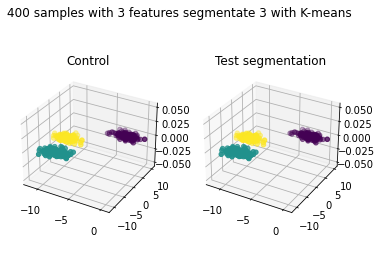

In [12]:
nb=400
features=3
cluster=3
X, labels = make_blobs(n_samples=nb, centers=3, n_features=features)
Vlabel=kmeans(X,k=cluster,nmax=1000)
pshow(X,labels,Vlabel,nb,features,cluster,space=features)

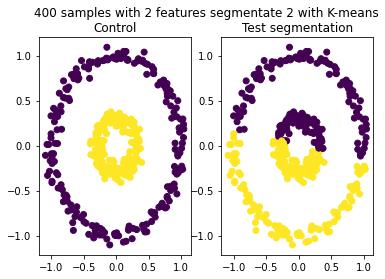

In [13]:
nb=400
features=2
X, labels = make_circles(n_samples=nb, factor=.3, noise=.05)
cluster=2
Vlabel=kmeans(X,k=cluster,nmax=1000)
#Vlabel=KernelKmeans(XX,k=2,gamma=2,nmax=1000) 
pshow(X,labels,Vlabel,nb,features,cluster,space=features)

## Kernel K-means

In [14]:
def kernelgaussian(X,gamma=2,labels=[-1]):
    #Projection in infinite space thanks gaussian
    X=X-np.mean(X,axis=0)
    X2 = pdist(X, 'sqeuclidean')  
    X3 = squareform(X2)
    X = np.exp(-gamma * X3)     

    if not(-1 in labels):
        fig=plt.figure()
        ax1 = fig.add_subplot(int1)
        ax1.set_title('Gaussian kernel projection')
        ax1.scatter(X[:,0],X[:,1])
        plt.show()
    return X

def KernelKmeans(X,k=2,gamma=5,nmax=1000):
    X=kernelgaussian(X,gamma)
    return kmeans(X,k,nmax)

### Test

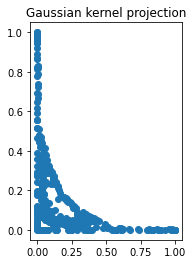

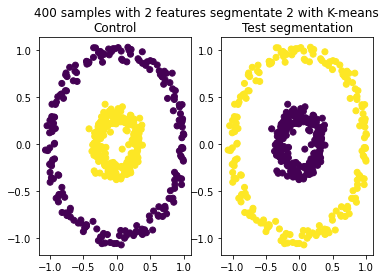

In [15]:
nb=400
XX, labels = make_circles(n_samples=nb, factor=.3, noise=.05)
cluster=2
Xs=kernelgaussian(XX,2,labels)
Vlabel=kmeans(Xs,k=cluster,nmax=1000)
#Vlabel=KernelKmeans(XX,k=2,gamma=2,nmax=1000) 
pshow(XX,labels,Vlabel,nb,2,cluster,space=2)

In [16]:
def pshow(Projection,title1,title2,title3,X,label,Vlabel,space):
    fig = plt.figure()
    plt.title(str(title1)+' samples with 2 features segmentate ' +str(title2)+' with K-means \n \n')
    plt.axis('off')

    int1=131
    if space==2:
        ax1 = fig.add_subplot(int1)
    else:
        ax1 = fig.add_subplot(int1,projection='3d')
    ax1.set_title('Projection for gamma='+str(title3))
    ax1.scatter(Projection[:,0],Projection[:,1],marker='o',c=label)
    
    int1=132
    if space==2:
        ax2 = fig.add_subplot(int1)
    else:
        ax2 = fig.add_subplot(int1,projection='3d')
    ax2.set_title('Control')
    ax2.scatter(X[:,0],X[:,1],marker='o',c=label)
    
    int2=133
    if space==2:
        ax3 = fig.add_subplot(int2)
    else:
        ax3 = fig.add_subplot(int2,projection='3d')
    ax3.set_title('Test segmentation')
    ax3.scatter(X[:,0],X[:,1],c=Vlabel)
    plt.show()

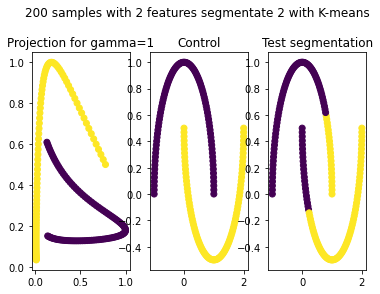

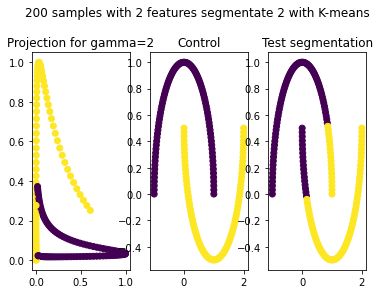

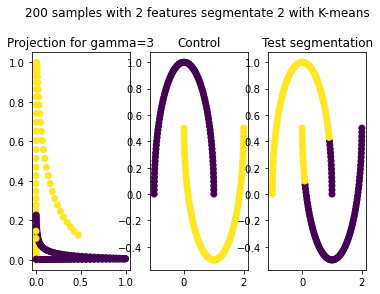

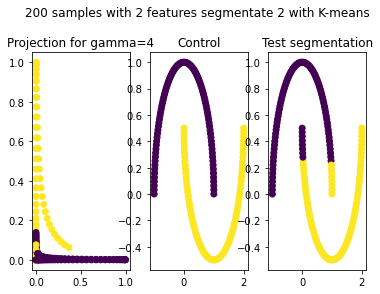

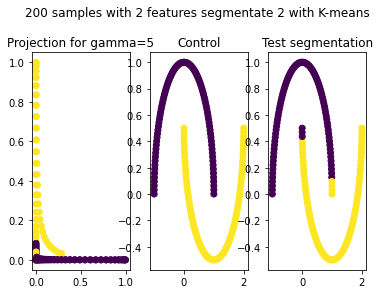

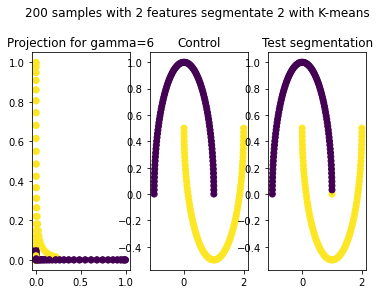

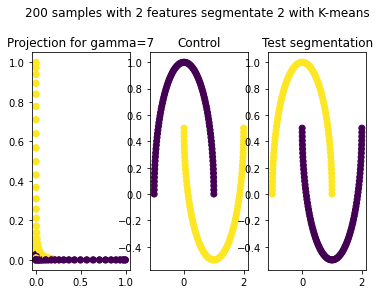

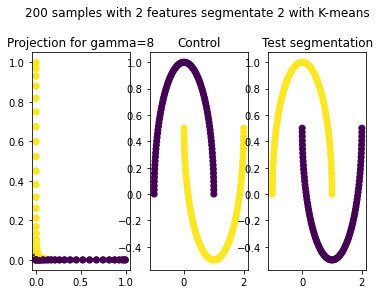

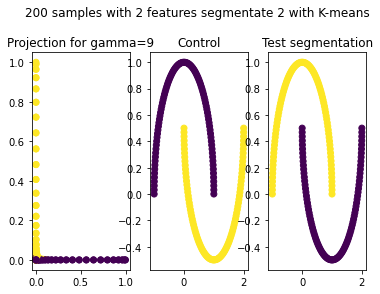

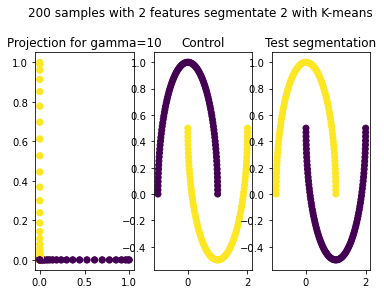

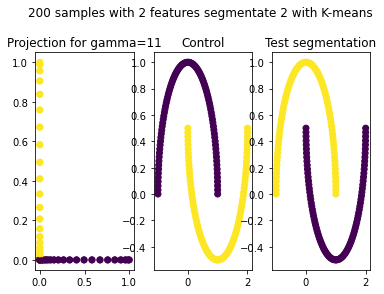

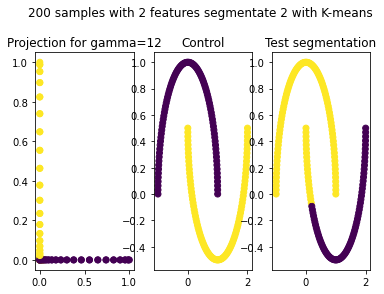

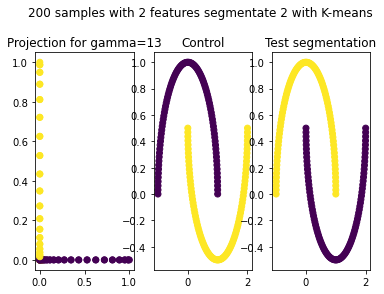

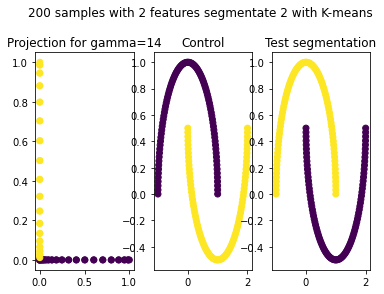

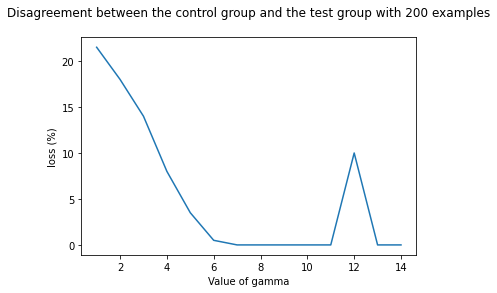

In [17]:
nb=200
XX, labels = make_moons(n_samples=nb, random_state=123)
#Gamma can be consider as a hyperparameter if we use a loss function to find the best solution for this problem
cluster=2
loss=[]
for gamma in range(1,15):
    #Vlabel=KernelKmeans(XX,k=2,gamma=2,nmax=1000) 
    Xs=kernelgaussian(XX,gamma)
    Vlabel=kmeans(Xs,k=cluster,nmax=1000)
    
    pshow(Xs,nb,cluster,gamma,XX,labels,Vlabel,space=2)
    
    disagreement=min(np.sum(abs(labels-Vlabel)),abs(nb-np.sum(abs(labels-Vlabel))))
    loss.append(100*(disagreement/nb))
    
fig = plt.figure()
plt.title('Disagreement between the control group and the test group with '+str(nb)+ ' examples\n')
plt.xlabel("Value of gamma")
plt.ylabel("loss (%)")
plt.plot(list(range(1,15)),loss)
plt.show()

# 3. One class SVM and Maximum Enclosing Ball

In [18]:
def datasetprepare(X,Y):
    """
    @Input
        X: Dataset with 2 labels
        Y: Labels
    @Output
        Xlab1,Ylab1: tuple of subdataset label1
        
        Xlab2,Ylab2: tuple of subdataset label2
    """
    Xlab1=[]
    Xlab2=[]
    Ylab1=[]
    Ylab2=[]
    Y = 2*Y - 1 # Rescale labels to be {-1,1}
    for pos,val in enumerate(Y):
        if val==1:
            Xlab1.append(X[pos])
            Ylab1.append(Y[pos])
        else:
            Xlab2.append(X[pos])
            Ylab2.append(Y[pos])
    return (np.array(Xlab1),np.array(Ylab1)),(np.array(Xlab2),np.array(Ylab2))
    
def findbestgamma(X):
    xplot=[]
    for g in range(1,20,1):
        xplot.append(kernelgaussian(X,g/10))

    fig = plt.figure()
    for i in xplot:
        plt.title('g='+str(g/10))
        plt.scatter(i[:,0],i[:,1],marker='o',c=Y)
        plt.show()
        
def pshow(X,Y,Z=None,titre=None,contour=False):
    
    plt.figure()
    if contour:
        plt.contourf(xx, yy, Z,cmap="gray")
        plt.contour(xx, yy, Z, linewidths=2,cmap="hot")
        cs = plt.contour(xx, yy,Z)
        plt.clabel(cs, inline=1)
    
    plt.scatter(X[:,0],X[:,1],marker='o',c=Y)
    plt.title(titre)
    plt.show()

We have some problem to resolve this exercice.
So we are going to code step by step and compute each function in the previous library. For that we have to use class.

For the benchmark and comparison with 2 class SVM we are going to use sklearn.

In [19]:
## Personal proposal
import cvxopt
from cvxopt import matrix
class SVDD():
    def __init__(self,gamma=1,C=None,k="rbf",nbborder=3):
        """
        Input:
            Gamma: parameter of gaussian kernel
            C: regularisation term
        """
        #Public value
        self.gamma=gamma
        try :
            if C>0:# and C<1:#d116 ???
                self.C=float(C)
            else:
                self.C=0.5
        except: 
            self.C=0.5
        self.k=k
        self.nbsup=nbborder
        
        #Private value
        self.support=None
        self.X=None
        self.X_support=None
        self.alpha=None
        self.alpha_support=None
        self.decision=None
    
    def kernel(self,X1=None, X2=None):
        """
        kernel projection
        Private function
        Input:
            X1: matrix of data
            X2: matrix of data reduce
        Output:
            X: Matrix
        """
        if self.k=="rbf":
            n1,m1 = np.shape(X1)
            n2,m2 = np.shape(X2)
            X = np.empty((n1, n2))
            gamma = self.gamma
            for i in range(n1):
                for j in range(n2):
                    X[i, j] = np.exp(-gamma * (np.linalg.norm(X1[i]-X2[j])**2))
        ###Implement other kernel ###
        return X
    
    def fit(self,X,slack=True):
        """
        Learning
        Input:
          X: sample associate with 1 label 
          Y: 1 label
        Output:
          solution: dictionnary from solvers
        """
        #Kernel
        XX=self.kernel(X,X)#projection 
        
        #Computation
            #dual problem in quadratic form (d133)
            
        #Initialisation
        n,m=np.shape(XX)

            #a^T*G*a-sum(a_i*y_i*norm2(x_i)^2)
        P = matrix(XX) #0.5*X^T*P*X
        q = matrix(-np.ones(n)) #+q^T*X

        print('Problem with slack variables:',slack)
        #Condition (0<a_i=-a_i<0) (d113)
        G = matrix(-1*np.diag(np.ones(n))) 
        h = matrix(np.zeros(n))#Gx<h
        
        if slack: #Condition (0<a_i=-a_i<0) and a_i<C 
            Gslack = matrix(np.diag(np.ones(n)))
            hslacks = matrix(self.C/n * np.ones(n))
            
            h = matrix(np.r_[h, hslacks])#(+d116)
            G = matrix(np.r_[G, Gslack])

            #Condition eTa=1
        A = matrix(np.ones((1, n))) #Ax=b ici identité
        b = matrix(np.ones(1)) #scalaire de type matrix
        #Resolve the problem
            #0.5*X^T*P*X+q^T*X with Gx<h and Ax=b
        cvxopt.solvers.options['show_progress'] = False
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        
        #Upload
        self.X=X
        self.alpha=np.ravel(solution.get('x'))
        
            #Borders
        self.support=np.where(np.abs(self.alpha) >= self.alpha[self.alpha.argsort()[-self.nbsup]])[0]
        self.alpha_support=self.alpha[self.support]
        self.X_support=X[self.support]
        
        return solution #dico okay

    def Radus(self):
        """
        Convert dual solution to primal solution
        Private function
        """
        G_support=self.kernel(self.X_support,self.X_support)
        binf = np.argmin(self.alpha_support) 
        R = np.dot(self.alpha_support,G_support)[binf]
        return R
    
    def decision_function(self,X):#generate the rules
        """
        Make a decisions based on data
        @input
            X: data
        @output
            Decision: allow us to plot the result
        We can put a threshold after self.Radus (-nb)<0 extend the border, +nb>0 minimise the borders
        """
        G=self.kernel(X,self.X_support)
        decision = np.dot(G,self.alpha_support) - self.Radus()#algorithm simplification to do here
        self.decision=decision
        return decision
    
    def predict(self,X):
        """
        @Input:
            X: Data
        @Output:
            Y: Labelisation
        """
        decision=self.decision_function(X)
        Y=np.sign(decision)
        return Y

In [20]:
def train(X,g=0.005,C=0.5,slack=True,k='rbf',nbsup=None):
    """
    Train the SVDD
    Input:
        X: Dataset
        g: parameter of gaussian kernel
        slack: Boolean for slack variables
    Output:
        svd: class SVDD
    """
    X=np.array(X)

    try :
        if (nbsup>10) and slack:
            nbsup=10
        else:
            nbsup=np.shape(X1)[0]*0.50
    except: 
        if slack:
            nbsup=min(np.shape(X1)[0]*0.05,10)
        else:
            nbsup=np.shape(X1)[0]*0.10
    nbsup=int(nbsup) 
    svd = SVDD(gamma=g,C=C,k=k,nbborder=nbsup)
    svd.fit(X,slack)
    
    return svd

def evaluate(svd,xx,yy):
    result = svd.decision_function(np.c_[xx.ravel(), yy.ravel()])    
    result = result.reshape(xx.shape)
    return result

In [21]:
nb=200
X, Y = make_moons(n_samples = nb, noise = 0.4, random_state = 42)
L1,L2= datasetprepare(X,Y)
X1,Y1=L2#Y1 for verification don't use in training

xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3,3, 100))    

### OCSVM without slack variables

Problem with slack variables: False


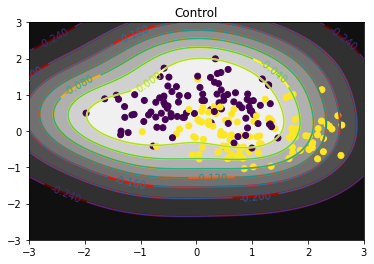

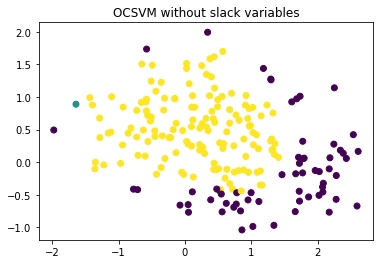

In [22]:
svd=train(X1,g=0.6,slack=False,k='rbf')
Z=evaluate(svd,xx,yy)

pshow(X,Y,Z,titre='Control',contour=True)

YY=svd.predict(X)
pshow(X,YY,Z,titre='OCSVM without slack variables')

### OCSVM with slack variables

Problem with slack variables: True


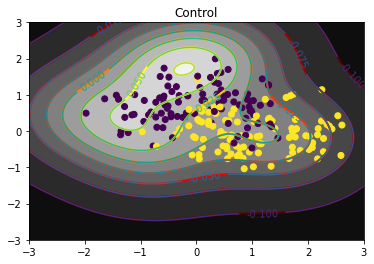

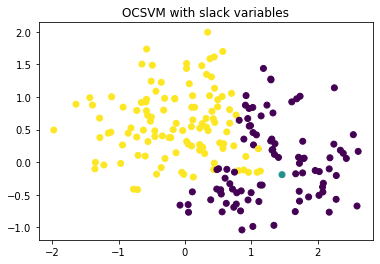

In [23]:
svd=train(X1,g=0.6,C=10,slack=True,k='rbf')
Z=evaluate(svd,xx,yy)

pshow(X,Y,Z,titre='Control',contour=True)

YY=svd.predict(X)
pshow(X,YY,Z,titre='OCSVM with slack variables')

### Library for SVDD two class

In [24]:
# Library for SVDD two class
def train(X,Y,n=0.01,k="rbf",g=0.005):
    from sklearn.svm import SVC
    svd = SVC(kernel=k, C=10)   
    a=svd.fit(X,Y)
    b=svd.predict(X) 
    return svd

svd=train(X,Y)
Z=evaluate(svd,xx,yy)
YY=svd.predict(X)

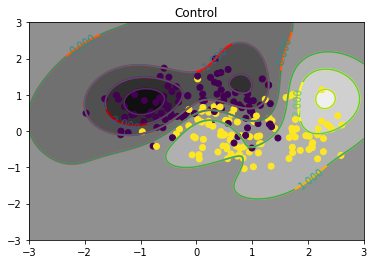

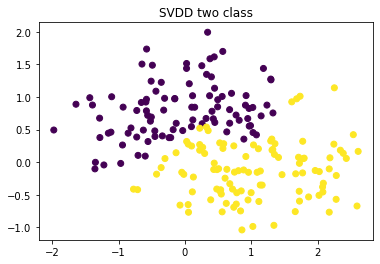

In [25]:
titre='Control'
pshow(X,Y,Z,titre=titre,contour=True)
titre='SVDD two class'
pshow(X,YY,Z,titre=titre)

# 4. Online Learning and SVM

##  4.1 Online Passive-Aggressive Algorithms


In [26]:
class OPAA:
    def __init__(self,relaxation='classic',C=0.75,gamma=2):
        """
        Online passive agressive algorithm
        @Input:
            gamma: gaussian projection
            relaxation: select updater of tau between "classic", "first", "second"
            c: parameter of updater for first and second
        """
        #Public
        self.gamma=gamma
        self.relaxation=relaxation
        self.C=C
        
        #Private
        self.t = 0
        self.w = None
        
    def loss(self, x, y):
        """
        Loss function Hinge
        @Input
            w: weight associate to x
            x: value of data
            y: True label
        @Output
            loss: value of loss
        """
        loss=np.maximum(0, 1-y*(np.dot(self.w,x)))
        return loss

    def tau(self,x,l):
        """
        @Input
            X: vertical vector of Data
            L: value of loss associate to X
            relaxation: select updater of tau between "classic", "first", "second"
            c: parameter of updater for first and second
        @Output
            retour: value avec update
        """
        relaxation=self.relaxation
        C=self.C
        
        retour = None # if error return None
        
        if relaxation == 'first':
            retour = l/float(np.linalg.norm(x)**2 + 1/(2*C))

        if relaxation == 'second':
            retour = min(C, l/float(np.linalg.norm(x)**2))

        else: #classic by default
            retour = l/float(np.linalg.norm(x)**2)
        return retour
    
    def algo(self,x,y):
        """
        Coeur de l'algorithme
        @Input:
            x: sample
            y: label of the sample 
        """
        n=np.shape(x)
        if self.w is None:
            self.w=np.zeros(np.shape(x))
        
        #d7
        yy=self.pred(x)#predict label : probleme here
        
        self.t=self.t+1#nb sample input
        for i in range(self.t):
            if yy!=y:#or/and pay the cost defined by the associated loss
                l=self.loss(x, y)
                tau=self.tau(x,l)
                if y==0:
                    self.w=self.w+tau*-1*x#update
                else:
                    self.w=self.w+tau*y*x
        return self
    
    def pred(self,X):
        """
        Predict for one sample X the label
        @Input
            X: a sample
        @Output
            Y: Predict label of X
        """
        yy=np.sign(np.dot(self.w,X))
        if yy<=0:
            yy=-1
        Y=int(yy)
        return Y
    
    def predict(self,X):
        """
        Predict label
        @Input
            X: Sample or set
        @Output
            Y: Label or list of label predicted
        """
        try:
            nb_sample,_=np.shape(X)
            Y=[]
            for i in range(0,nb_sample,1):
                #Projection
                x=np.exp(-self.gamma *X[i]**2)
                
                yy=self.pred(x)
                Y.append(yy)
        except:
            #Projection
            Y=0
            x=np.exp(-self.gamma *X**2)
            Y=self.pred(x)
        return Y

    def fit(self,X,Y):
        """
        #diapo 7/10 + pdf
        @Input
            X: sample or data set
            Y: true label
        """
        print(self.relaxation)
        try:#dataset
            nb_sample,_=np.shape(X)
            for i in range(0,np.shape(X)[0],1):# à mettre dans le fit avec un np.shape(Y)
                x=X[i]
                
                #Projection
                x=np.exp(-self.gamma *x**2)

                self.algo(x,Y[i])
        except:#element
            x=np.exp(-self.gamma *X**2)
            self.algo(X,Y)
        
        return self

In [39]:
nb=300
X, Y = make_moons(n_samples = nb, noise = 0.4, random_state = 42)
X=np.array(X)
Y=np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

We have a stability problem with this algorithm, if you don't have a satisfying result, please recall the previous cell. Peformance test not relevant de facto.

### Classic relaxation

classic
classic
Check Label one sample:  1


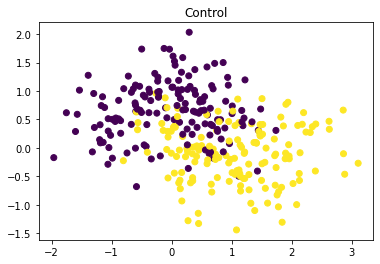

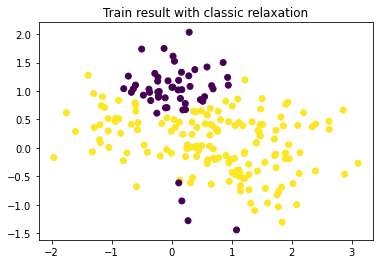

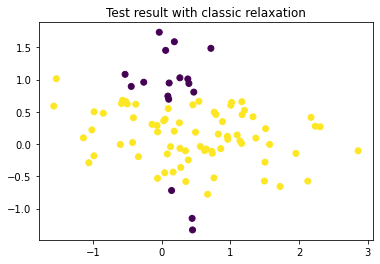

In [40]:
opaa0=OPAA(gamma=5)
#Train
#Fit set
opaa0.fit(X_train,Y_train)
#Predict set
YY_train=opaa0.predict(X_train)

#One sample
#Fit one sample
opaa0.fit(X_test[0],Y_test[0])
#Predict one sample
print('Check Label one sample: ',opaa0.predict(X_test[0]))

#Test
YY_test=opaa0.predict(X_test)

pshow(X,Y,titre="Control")
pshow(X_train,YY_train,titre="Train result with classic relaxation")
pshow(X_test,YY_test,titre="Test result with classic relaxation")

### First relaxation

first


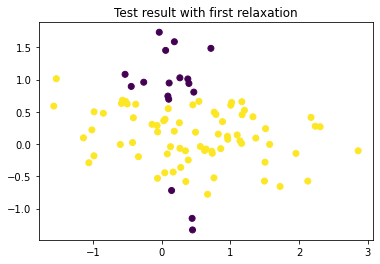

In [41]:
opaa1=OPAA(gamma=5,relaxation='first',C=0.75)#if C=inf then relaxation=classic
#Train
opaa1.fit(X_train,Y_train)
#Predict set

#Test
YY_test=opaa1.predict(X_test)
pshow(X_test,YY_test,titre="Test result with first relaxation")

### Second relaxation

second


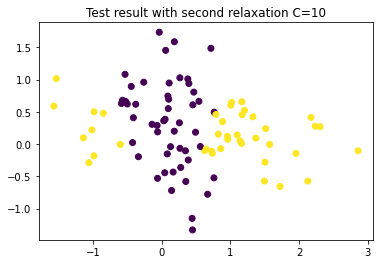

In [42]:
C=10
opaa2=OPAA(gamma=5,relaxation='second',C=C)
#Train2
opaa2.fit(X_train,Y_train)

#Test
YY_test=opaa2.predict(X_test)
pshow(X_test,YY_test,titre='Test result with second relaxation C='+str(C))

second


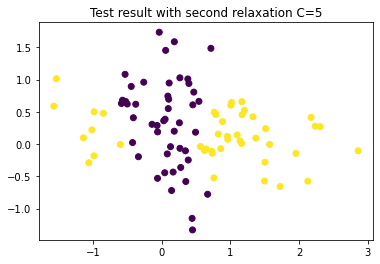

In [43]:
C=5
opaa2=OPAA(gamma=5,relaxation='second',C=C)#if C=inf then relaxation=classic
#Train2
opaa2.fit(X_train,Y_train)

#Test
YY_test=opaa2.predict(X_test)
pshow(X_test,YY_test,titre='Test result with second relaxation C='+str(C))

## 4.2 Incremental LASVM

In [60]:
def rbf(gamma):
    def kernel(x1,x2):
        x = x1-x2
        return np.exp(-gamma*np.dot(x,x))
    return kernel

class LASVM():
    def __init__(self, C=1, kernel=rbf(3), tau=1,itermax=50):
        #public:
        self.C = C
        self.k = kernel
        self.tau = tau
        self.itermax=itermax
        
        #private
        self.alpha = []
        self.g = []
        #support
        self.S = []
        self.y = []
        
        self.b = 0
        self.delta = 0

    def predict(self, xx):
        yy=sum(self.alpha[i]*self.k(self.S[i],xx) for i in range(len(self.S)))
        if yy<.5:#approximation
            yy=0
        else:
            yy=1
        return yy

    def A(self, i):
        #private
        return min(0, self.C*self.y[i])
    
    def B(self, i):
        #private
        return max(0, self.C*self.y[i])

    def idxj(self):
        #private
        for i in range(len(self.S)):
            if self.alpha[i]>self.A(i):
                 j = np.argmin(self.g[i])
        return j
    
    def idxi(self):
        #private
        for j in range(len(self.S)):
            if self.alpha[j]>self.A(j):
                 i = np.argmax(self.g[j])
        return i    
    
    def tau_violating(self, i, j):#1584 step 2
        #private
        condition=((self.alpha[i] < self.B(i)) and 
                   (self.alpha[j] > self.A(j)) and 
                   (self.g[i] - self.g[j] > self.tau))
        return condition

    def f_lambda(self, i, j):#1584 step 3 equation 8 smo
        val_lambda = min((self.g[i]-self.g[j])/(self.k(self.S[i],self.S[i])+self.k(self.S[j],self.S[j])-2*self.k(self.S[i],self.S[j])),
                         self.B(i)-self.alpha[i],
                         self.alpha[j]-self.A(j))
        return val_lambda

    
    def lasvm_process(self, xx, yy):
        #private
        #Step 1
        for i in self.S:
            if all(xx==i):
                return
        
        #Step 2
        self.alpha.append(0)
        self.g.append(yy - self.predict(xx))
        
        self.S.append(xx)
        self.y.append(yy)
        
        #step 3
        if yy == 1:
            i = len(self.S)-1 # position du dernier element ajouté
            j = self.idxj()
        else:
            j = len(self.S)-1
            i = self.idxi()
        
        #step 4
        if self.tau_violating(i, j): 
            #step 5
            val_lambda = self.f_lambda(i,j)
            
            self.alpha[i] = self.alpha[j] + val_lambda
            self.alpha[j] = self.alpha[j] - val_lambda
            
            for s in range(len(self.S)):
                self.g[s] = self.g[s]- val_lambda*(self.k(self.S[i],self.S[s])-self.k(self.S[j],self.S[s]))

    def lasvm_reprocess(self):
        #private
        #step 1
        i=self.idxi()
        j=self.idxj()
        #step 2
        if self.tau_violating(i, j): 
            #step3
            val_lambda = self.f_lambda(i,j)
            
            self.alpha[i] = self.alpha[j] + val_lambda
            self.alpha[j] = self.alpha[j] - val_lambda
            
            for s in range(len(self.S)):
                self.g[s] = self.g[s]- val_lambda*(self.k(self.S[i],self.S[s])-self.k(self.S[j],self.S[s]))
            
            #step 4
            i= self.idxi()
            j=self.idxj()
            
            idx=[]
            for s in range(len(S)):
                if self.alpha[s] == 0 and (self.y[s]==-1 and self.g[s]>=self.g[i]) or (self.y[s]==1 and self.g[s]<=self.g[j]):
                    idx.append(s)
            self.alpha = [i for j, i in enumerate(self.alpha) if j not in idx]
            self.S = [i for j, i in enumerate(self.S) if j not in idx]
            self.y = [i for j, i in enumerate(self.y) if j not in idx]
            self.g = [i for j, i in enumerate(self.g) if j not in idx]
            
            #step5
            self.b = (self.g[i]+self.g[j])/2.
            self.delta = self.g[i]-self.g[j]

    def fit(self, xx, yy):
        """
        xx: sample or dataset
        yy: label
        """
        try:#dataset
            n,m=np.shape(xx)
            for i in zip(xx,yy):
                self.fit(i[0],i[1])
        except:#sample
            #Initialisation
            if len(self.S) < 10:
                self.S.append(xx)
                self.y.append(yy)
                self.alpha.append(yy)
                self.g.append(0)
                for i in range(len(self.S)):
                    self.g[i] = self.y[i]-self.predict(self.S[i])#equation 9
            #Online iterations
            else:
                self.lasvm_process(xx,yy)
                self.lasvm_reprocess()
                tour=0
                while (self.delta<self.tau) and (tour<self.itermax):
                    self.lasvm_reprocess()
                    tour=tour+1

In [61]:
lasvm=LASVM()
lasvm.fit(X_train[:20],Y_train[:20])#dataset

for i in zip(X_train[20:],Y_train[20:]):#sample by sample
    lasvm.fit(i[0],i[1])
    
#training time
YY_train=[]
for i in X_train:
    YY_train.append(lasvm.predict(i))

#test time
YY_test=[]
for i in X_test:
    YY_test.append(lasvm.predict(i))

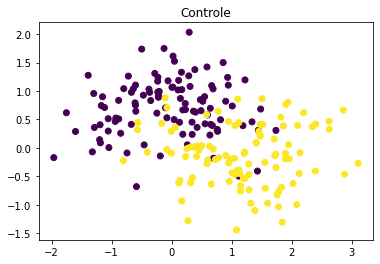

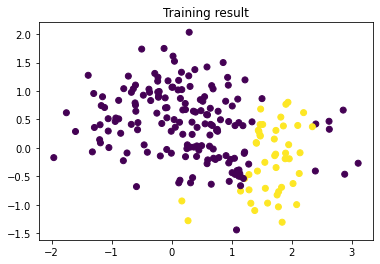

In [62]:
pshow(X_train,Y_train,titre='Controle')
pshow(X_train,YY_train,titre='Training result')

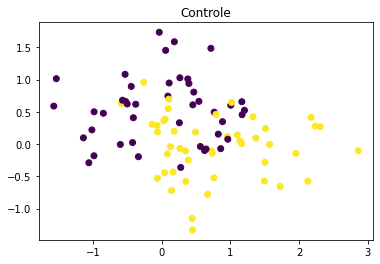

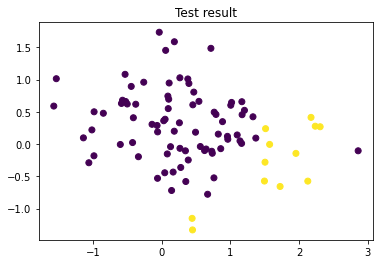

In [63]:
pshow(X_test,Y_test,titre='Controle')
pshow(X_test,YY_test,titre='Test result')

# Sources

### PCA
https://www.kaggle.com/pmmilewski/pca-decomposition-and-keras-neural-network

http://pmaweb.caltech.edu/~physlab/lab_21_current/Ph21_5_Covariance_PCA.pdf

https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

http://factominer.free.fr/reporting/Investigate_ACP.html

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html

https://en.wikipedia.org/wiki/Kernel_(statistics)


### SVDD
https://core.ac.uk/download/pdf/51290056.pdf

http://is.tuebingen.mpg.de/fileadmin/user_upload/files/publications/primal_[0].pdf

https://hal.archives-ouvertes.fr/hal-01965995/file/14.mlsp.oneclass.pdf

https://pythonprogramming.net/soft-margin-kernel-cvxopt-svm-machine-learning-tutorial/

https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf?fbclid=IwAR3mTSd_FB9NLIhPIFIYC2sLH1ag9-Gn2oyAd6hpAYscOUn_2BMFJyfa3_Y

https://hal.archives-ouvertes.fr/hal-00593397/document

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html


### OPAA

https://jmlr.csail.mit.edu/papers/volume7/crammer06a/crammer06a.pdf

### SMO/LASVM

http://cs229.stanford.edu/materials/smo.pdf

https://leon.bottou.org/projects/lasvm

# Others proposals

In [36]:
# Personal proposal for Kmeans
def kmeans(X,k=2,nmax=1000):
    """
    Goal: Segmentation dataset on k partitions
    @input:
        X: Dataset line: samples
                   column: features
        k: number of segmentation, default value equal 2
        nmax: max iteration of algorithm
    @output:
        Vlabel: array of labels associate with each samples
        Vcentroid: array of centroide of each labels #is it usefull? pb with Kernel position
    """
    # Initialisation
    n,m=np.shape(X)#n: number of samples, m: number of features
    Vlabel=np.zeros(n)# zeros is not a label
    Vcentroid=[]
    
    #Random initialisation
    idx=[]
    i=0
    while i<k:
        pos=np.random.randint(1,n)
        if not(pos in idx):
            idx.append(pos)# we exatly have k randominitialisation
            i=i+1
    i=0
    for pos in idx:
        i=i+1
        Vlabel[pos]=i#attribute the label
        Vcentroid.append(X[pos])#put array of features in pos associate to the labels
        
    #print(Vlabel,Vcentroid) okay
    
    for iteration in range(0,nmax):
        #Distance/Labelisation
        for idx, sample in enumerate(X):
            nlab=0
            d=1e1000000
            for idx2, pcenter in enumerate(Vcentroid):
                #dn=scipy.spatial.distance.cdist(sample, pcenter, metric='euclidean')
                dn=np.sum(np.power(pcenter-sample,2))#norm in square
                if dn<d:
                    d=dn
                    nlab=idx2+1#label commence à 1
            Vlabel[idx]=nlab #update label

        #Compute new Centroid
        nbelem=0
        for lab in range(1,k+1):
            for idx, elemlab in enumerate(Vlabel):
                if elemlab==lab:
                    nbelem=nbelem+1
                    try:
                        new_center=new_center+X[idx]
                    except:#first iteration
                        new_center=X[idx]
            new_center=new_center/nbelem
            Vcentroid[lab-1]=new_center
    #print(Vcentroid)
    return Vlabel#,Vcentroid